In [31]:
library(data.table)
library(tidyverse)
setwd('~/dpetrov/MarkB/Orchard2021Data/18_HAFPipe_Validation/AFs/')

In [2]:
#Comparing HAF-pipe generated allele frequencies to different subsampled reads



In [3]:
load('./orch2021_SubSampReads.A.RData')
set.a = afmat
load('./orch2021_SubSampReads.B.RData')
set.b = afmat

In [4]:
#get data for time points 3 and 11 separately
data.11 = data.frame()
for (col in 1:6){
    df = as.data.frame(cbind(set.a[,col], set.b[,col]))
    data.11 = rbind(data.11, df) 
    
}

In [5]:
data.3 = data.frame()
for (col in 7:ncol(set.a)){
    df = as.data.frame(cbind(set.a[,col], set.b[,col]))
    data.3 = rbind(data.3, df) 
    
}

In [7]:
#get stats:
cor.test(data.11$V1, data.11$V2)
cor.test(data.3$V1, data.3$V2)
#best fit linear regression of HAFs 
lm_model.3 <- lm(V1 ~ V2, data = data.3)
lm_model.11 <- lm(V1 ~ V2, data = data.11)
summary(lm_model.3)
summary(lm_model.11)


	Pearson's product-moment correlation

data:  data.11$V1 and data.11$V2
t = 44047, df = 8816500, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9977326 0.9977385
sample estimates:
      cor 
0.9977356 



	Pearson's product-moment correlation

data:  data.3$V1 and data.3$V2
t = 71481, df = 14694000, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9985637 0.9985666
sample estimates:
      cor 
0.9985652 



Call:
lm(formula = V1 ~ V2, data = data.3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.088441 -0.007558 -0.000078  0.007494  0.086255 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 4.742e-04  5.170e-06    91.71   <2e-16 ***
V2          9.984e-01  1.397e-05 71480.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01255 on 14694098 degrees of freedom
Multiple R-squared:  0.9971,	Adjusted R-squared:  0.9971 
F-statistic: 5.11e+09 on 1 and 14694098 DF,  p-value: < 2.2e-16



Call:
lm(formula = V1 ~ V2, data = data.11)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.122047 -0.009471 -0.000104  0.009409  0.119606 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 7.066e-04  8.362e-06    84.51   <2e-16 ***
V2          9.974e-01  2.265e-05 44046.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01581 on 8816458 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9955 
F-statistic: 1.94e+09 on 1 and 8816458 DF,  p-value: < 2.2e-16


In [19]:
as.numeric(coef((lm_model.3)[1])[1])

[1] 0.0004741638

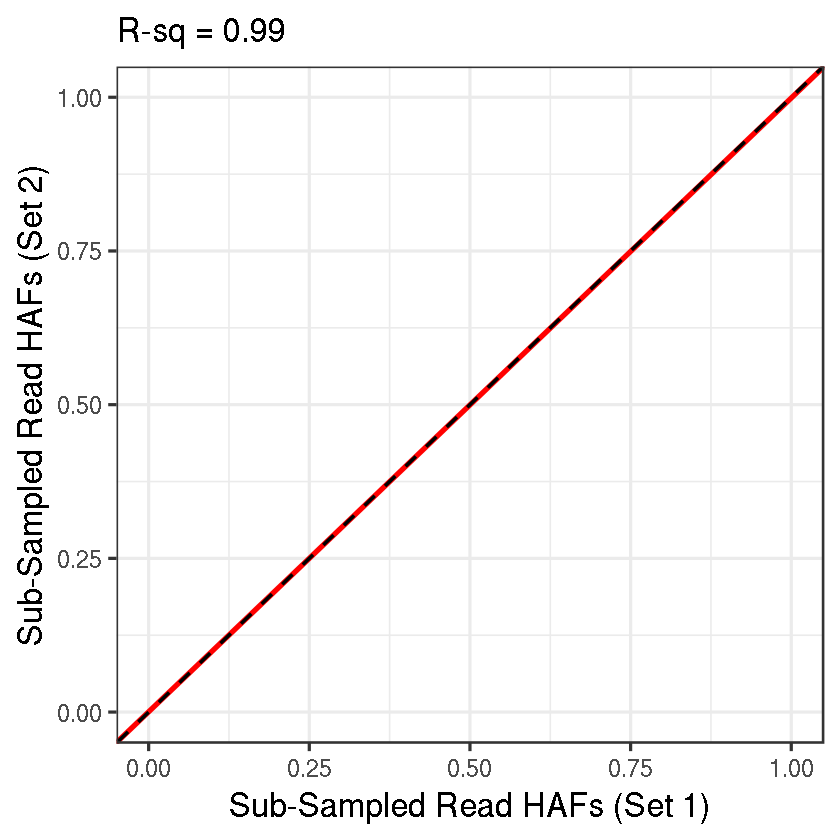

In [25]:
p.t3 = ggplot() +
  geom_abline(intercept = as.numeric(coef((lm_model.3)[1])[1]), slope = as.numeric(coef(lm_model.3)[2]),color = "red", linewidth = 1.5) +  # Regression line
  geom_abline(intercept = 0, slope = 1,  linetype = "dashed", color = "black", linewidth = 1) +  # 1:1 line
  labs(x = "Sub-Sampled Read HAFs (Set 1)", y = "Sub-Sampled Read HAFs (Set 2)") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle('R-sq = 0.99') +
    xlim(0, 1) +
    ylim(0,1)
p.t3
ggsave('../../Figures/HAF_SubSampReads_T3_Comp.pdf',p.t3, width = 10, height = 10)

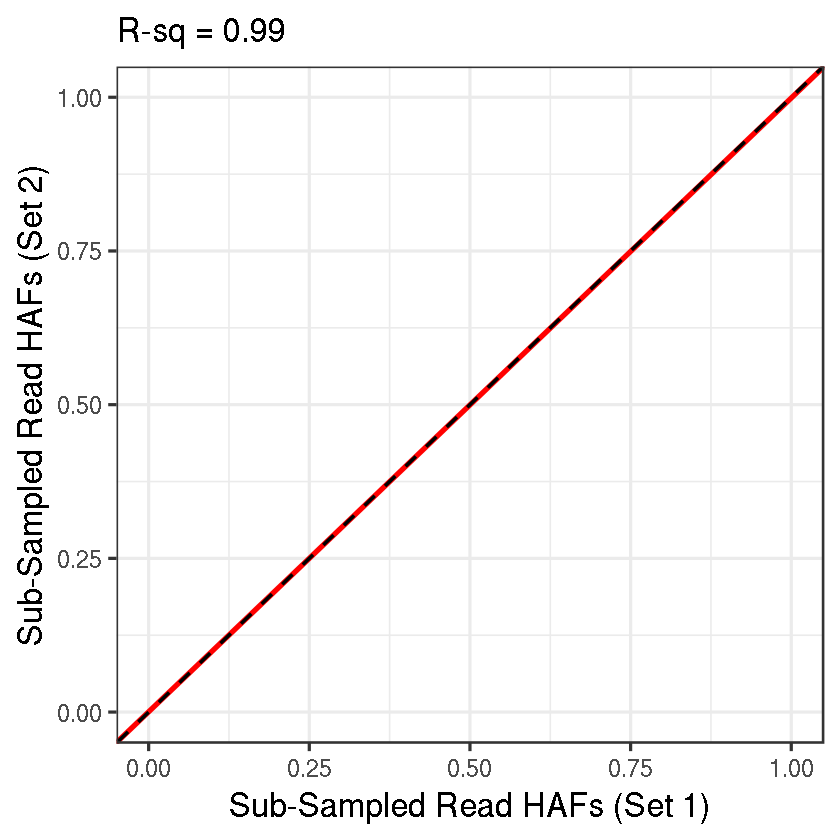

In [26]:
p.t11 = ggplot() +
  geom_abline(intercept = as.numeric(coef((lm_model.3)[1])[1]), slope = as.numeric(coef(lm_model.3)[2]),color = "red", linewidth = 1.5) +  # Regression line
  geom_abline(intercept = 0, slope = 1,  linetype = "dashed", color = "black", linewidth = 1) +  # 1:1 line
  labs(x = "Sub-Sampled Read HAFs (Set 1)", y = "Sub-Sampled Read HAFs (Set 2)") +  # Labels and title +
    theme_bw(base_size = 20) +
    xlim(0, 1) +
    ggtitle('R-sq = 0.99') +
    ylim(0,1)
p.t11
ggsave('../../Figures/HAF_SubSampReads_T11_Comp.pdf', p.t11, width = 10, height = 10)

In [26]:
library(cowplot)

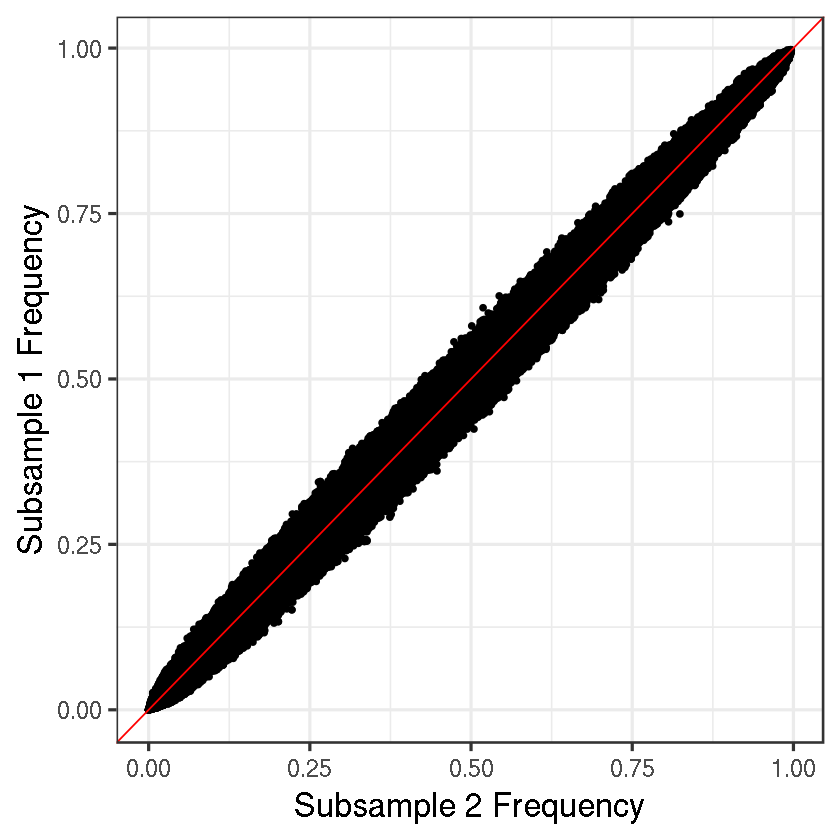

In [15]:
p.3 = ggplot(data.3, aes(x = V1, y = V2)) +
  geom_point() +  # Add points
  geom_abline(intercept = 0, slope = 1, color = "red") +  # Add 1:1 line
  labs(x = "Subsample 2 Frequency", y = "Subsample 1 Frequency")  +
    theme_bw(base_size = 20)
p.3
ggsave('../Figures/HAFValidation_SubSampleReads_T3.png', width = 10, height = 10)

In [13]:
##Comparing pool-seq generated af's ot HAF-pipe generated af's

In [14]:
setwd('~/dpetrov/MarkB/Orchard2021Data/18_HAFPipe_Validation/AFs/')

In [3]:
#Compare to 100x:
load('./orch2021_PoolSeq.100x.RData')
#Filter HAFs to only sites where we have data in the PoolSeq:
load('../AFs/orch2021_SubSampReads.A.RData', verbose = TRUE)
df.a = cbind(sites, afmat)
df.a = left_join(sites.PoolSeq, df.a)
sites = df.a %>% dplyr::select(chrom, pos)
afmat = df.a %>% dplyr::select(-chrom, -pos)
afmat = as.data.frame(afmat)
#bind each column of respective samples to each other
afmat.PoolSeq = as.data.frame(afmat.PoolSeq)


Loading objects:
  sites
  samps
  afmat


Joining with `by = join_by(chrom, pos)`


In [14]:
data.11 = data.frame()
for (i in 1:6){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.11 = rbind(data.11, df) 
    
}   


data.3 = data.frame()
for (i in 7:ncol(afmat.PoolSeq)){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.3 = rbind(data.3, df) 
    
}   
#Run cor.test and linear model
lm_model <- lm(V1 ~ V2, data = data.11)
r.11 <- summary(lm_model)$r.squared
r.11

lm_model <- lm(V1 ~ V2, data = data.3)
r.3 <- summary(lm_model)$r.squared
r.3

[1] 0.8800905

[1] 0.8884539

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 11 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 11 rows containing non-finite values (`stat_smooth()`).”


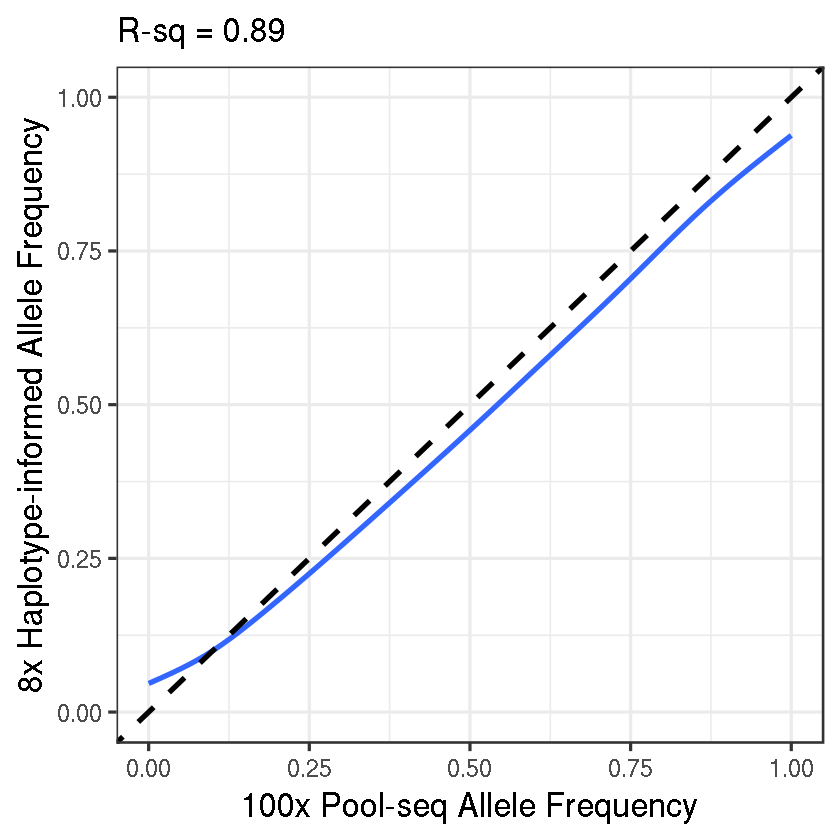

In [21]:
#plot smooth fit of 500000 snps - all data
data.sub = data %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "100x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.89')) 
p

ggsave('../../Figures/HAF_PoolSeq_100xComp.GeomSmooth.pdf',p, height = 10, width = 10)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”


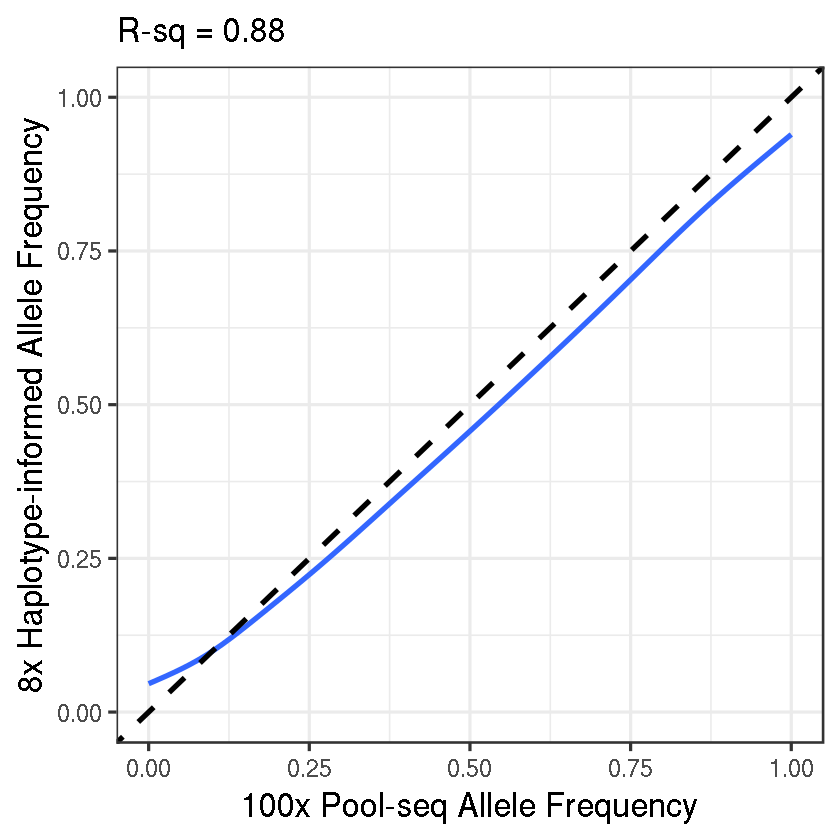

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”


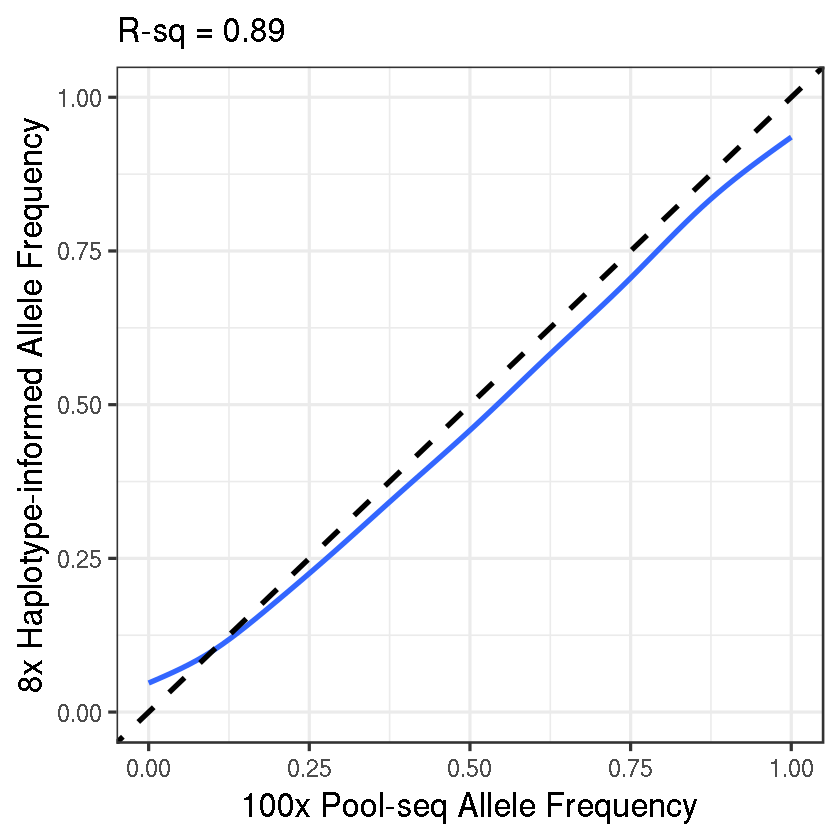

In [15]:
#plot smooth fit of 500000 snps
data.sub = data.11 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "100x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.88')) 
p

ggsave('../../Figures/HAF_PoolSeq_100xComp.t11.GeomSmooth.pdf',p, height = 10, width = 10)

#plot smooth fit of 500000 snps
data.sub = data.3 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "100x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.89')) 
p

ggsave('../../Figures/HAF_PoolSeq_100xComp.t3.GeomSmooth.pdf',p, height = 10, width = 10)

In [32]:
#Compare to 75x:
load('./orch2021_PoolSeq.75x.RData')
#Filter HAFs to only sites where we have data in the PoolSeq:
load('../AFs/orch2021_SubSampReads.A.RData', verbose = TRUE)
df.a = cbind(sites, afmat)
df.a = left_join(sites.PoolSeq, df.a)
sites = df.a %>% dplyr::select(chrom, pos)
afmat = df.a %>% dplyr::select(-chrom, -pos)
afmat = as.data.frame(afmat)
#bind each column of respective samples to each other
afmat.PoolSeq = as.data.frame(afmat.PoolSeq)
data = data.frame()
for (i in 1:ncol(afmat.PoolSeq)){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data = rbind(data, df) 
    
}   



Loading objects:
  sites
  samps
  afmat


Joining with `by = join_by(chrom, pos)`


In [75]:
#Run cor.test and linear model
cor.test(data$V1, data$V2)
lm_model <- lm(V1 ~ V2, data = data)
summary_model = summary(lm_model)
coefficients <- coef(summary_model)
slope.75x <- coefficients["V2", "Estimate"]
intercept.75x <- coefficients["(Intercept)", "Estimate"]


	Pearson's product-moment correlation

data:  data$V1 and data$V2
t = 13178, df = 23400000, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9387054 0.9388016
sample estimates:
      cor 
0.9387535 


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2358 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2358 rows containing non-finite values (`stat_smooth()`).”


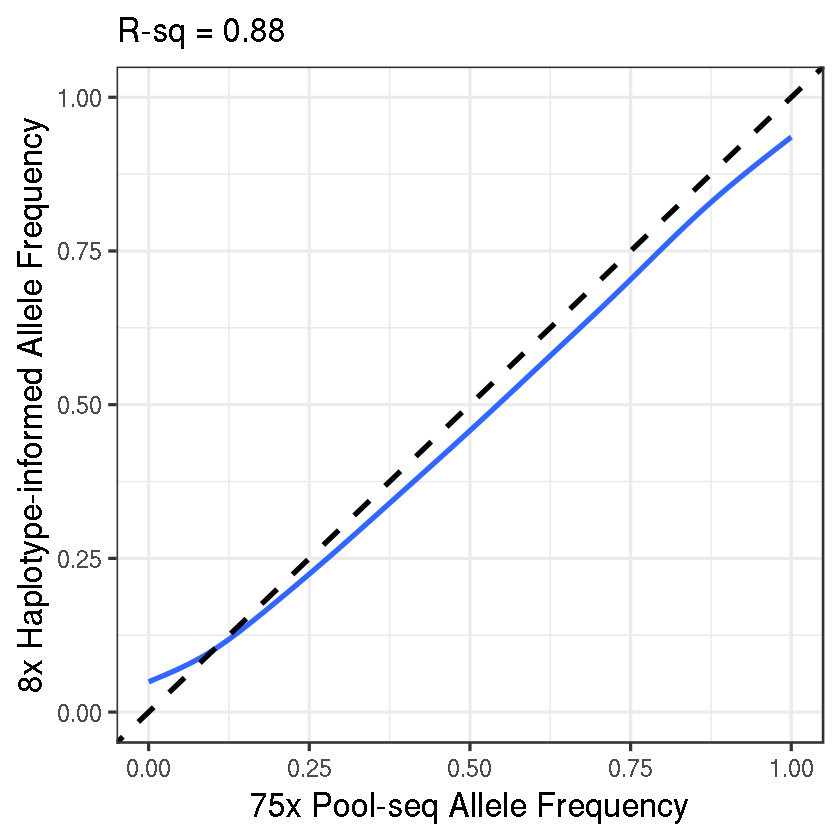

In [23]:
#plot smooth fit of 500000 snps
data.sub = data %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "75x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle('R-sq = 0.88') 
p

ggsave('../../Figures/HAF_PoolSeq_75xComp.GeomSmooth.pdf',p, height = 10, width = 10)

In [33]:
data.11 = data.frame()
for (i in 1:6){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.11 = rbind(data.11, df) 
    
}   


data.3 = data.frame()
for (i in 7:ncol(afmat.PoolSeq)){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.3 = rbind(data.3, df) 
    
}   
#Run cor.test and linear model
lm_model <- lm(V1 ~ V2, data = data.11)
r.11 <- summary(lm_model)$r.squared
r.11

lm_model <- lm(V1 ~ V2, data = data.3)
r.3 <- summary(lm_model)$r.squared
r.3

[1] 0.8766148

[1] 0.8840879

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2330 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2330 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2344 rows containing non-finite values (`stat_smooth()`).”


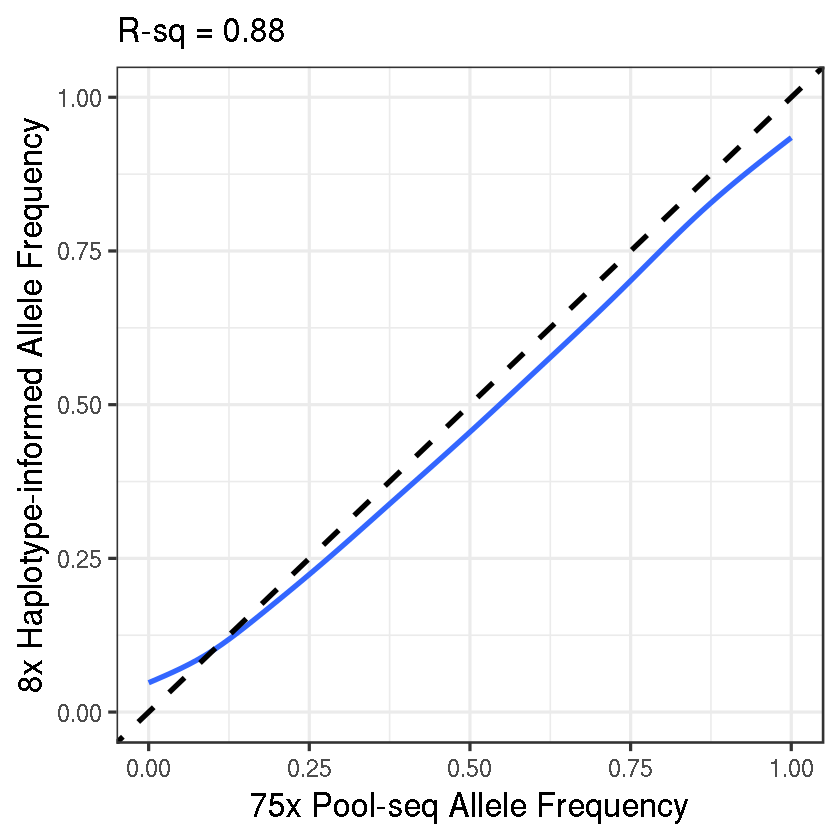

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2344 rows containing non-finite values (`stat_smooth()`).”


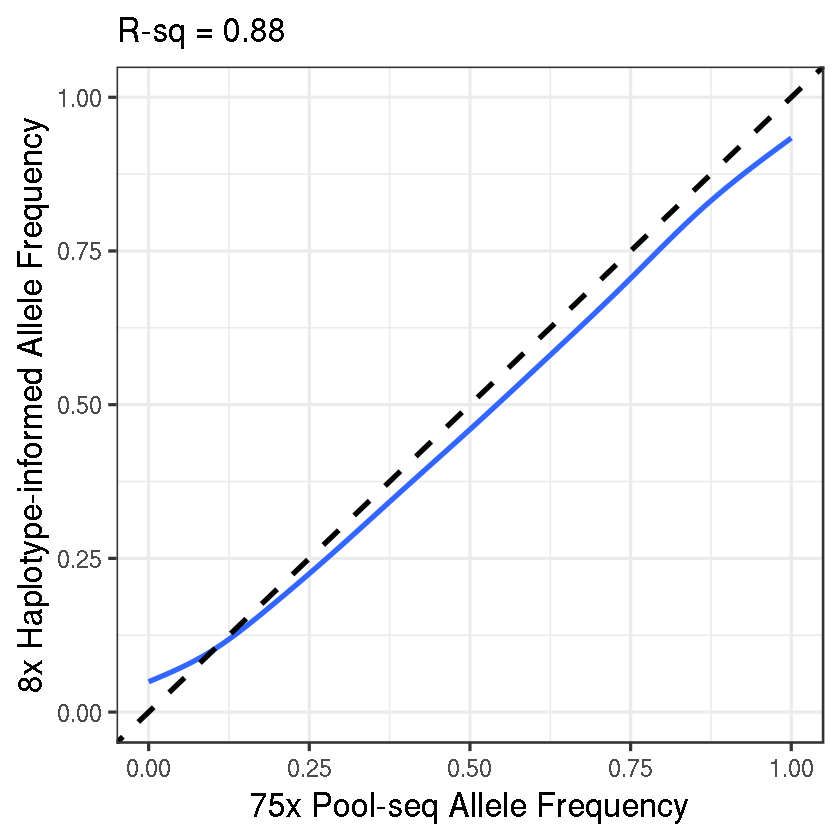

In [34]:
#plot smooth fit of 500000 snps
data.sub = data.11 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "75x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.88')) 
p

ggsave('../../Figures/HAF_PoolSeq_75xComp.t11.GeomSmooth.pdf',p, height = 10, width = 10)

#plot smooth fit of 500000 snps
data.sub = data.3 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "75x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.88')) 
p

ggsave('../../Figures/HAF_PoolSeq_75xComp.t3.GeomSmooth.pdf',p, height = 10, width = 10)

In [35]:
#Compare to 50x:
load('./orch2021_PoolSeq.50x.RData')
#Filter HAFs to only sites where we have data in the PoolSeq:
load('../AFs/orch2021_SubSampReads.A.RData', verbose = TRUE)
df.a = cbind(sites, afmat)
df.a = left_join(sites.PoolSeq, df.a)
sites = df.a %>% dplyr::select(chrom, pos)
afmat = df.a %>% dplyr::select(-chrom, -pos)
afmat = as.data.frame(afmat)
#bind each column of respective samples to each other
afmat.PoolSeq = as.data.frame(afmat.PoolSeq)
data = data.frame()
for (i in 1:ncol(afmat.PoolSeq)){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data = rbind(data, df) 
    
} 

Loading objects:
  sites
  samps
  afmat


Joining with `by = join_by(chrom, pos)`


In [ ]:
  
#Run cor.test and linear model
cor.test(data$V1, data$V2)
lm_model <- lm(V1 ~ V2, data = data)
summary_model = summary(lm_model)
coefficients <- coef(summary_model)
slope.50x <- coefficients["V2", "Estimate"]
intercept.50x <- coefficients["(Intercept)", "Estimate"]


In [36]:
data.11 = data.frame()
for (i in 1:6){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.11 = rbind(data.11, df) 
    
}   


data.3 = data.frame()
for (i in 7:ncol(afmat.PoolSeq)){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.3 = rbind(data.3, df) 
    
}   
#Run cor.test and linear model
lm_model <- lm(V1 ~ V2, data = data.11)
r.11 <- summary(lm_model)$r.squared
r.11

lm_model <- lm(V1 ~ V2, data = data.3)
r.3 <- summary(lm_model)$r.squared
r.3

[1] 0.8626598

[1] 0.8688582

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 5369 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 5369 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 5357 rows containing non-finite values (`stat_smooth()`).”


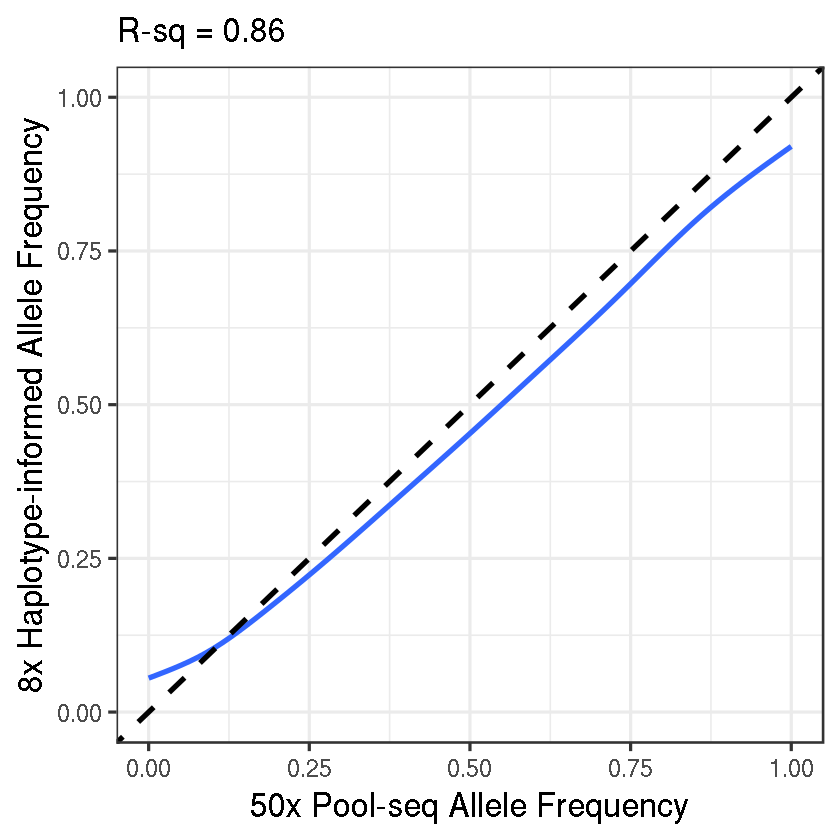

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 5357 rows containing non-finite values (`stat_smooth()`).”


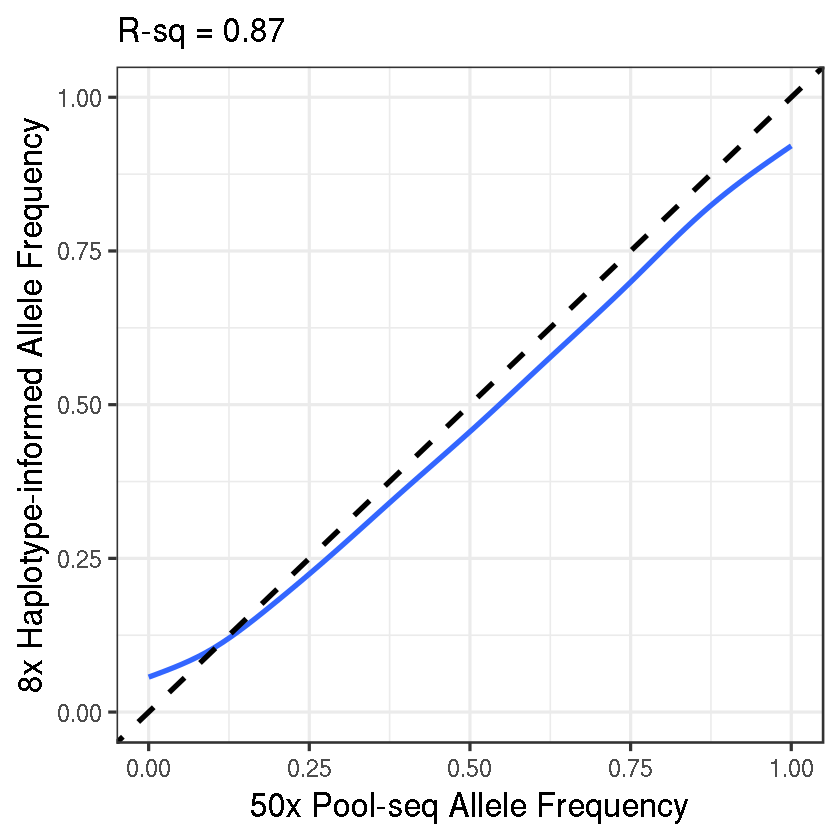

In [37]:
#plot smooth fit of 500000 snps
data.sub = data.11 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "50x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.86')) 
p

ggsave('../../Figures/HAF_PoolSeq_50xComp.t11.GeomSmooth.pdf',p, height = 10, width = 10)

#plot smooth fit of 500000 snps
data.sub = data.3 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "50x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.87')) 
p

ggsave('../../Figures/HAF_PoolSeq_50xComp.t3.GeomSmooth.pdf',p, height = 10, width = 10)

In [38]:
#Compare to 25x:
load('./orch2021_PoolSeq.25x.RData')
#Filter HAFs to only sites where we have data in the PoolSeq:
load('../AFs/orch2021_SubSampReads.A.RData', verbose = TRUE)
df.a = cbind(sites, afmat)
df.a = left_join(sites.PoolSeq, df.a)
sites = df.a %>% dplyr::select(chrom, pos)
afmat = df.a %>% dplyr::select(-chrom, -pos)
afmat = as.data.frame(afmat)
#bind each column of respective samples to each other
afmat.PoolSeq = as.data.frame(afmat.PoolSeq)
data = data.frame()
for (i in 1:ncol(afmat.PoolSeq)){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data = rbind(data, df) 
    
} 

Loading objects:
  sites
  samps
  afmat


Joining with `by = join_by(chrom, pos)`


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 10092 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 10092 rows containing non-finite values (`stat_smooth()`).”


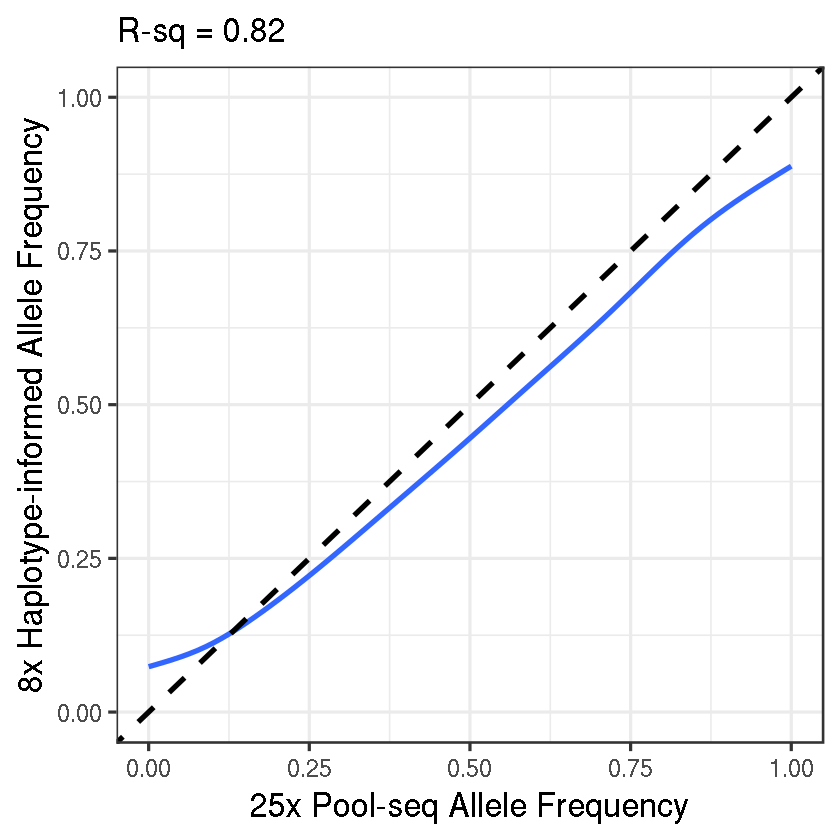

In [31]:
#plot smooth fit of 500000 snps
data.sub = data %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "25x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle('R-sq = 0.82') 
p

ggsave('../../Figures/HAF_PoolSeq_25xComp.GeomSmooth.pdf',p, height = 10, width = 10)

In [39]:
data.11 = data.frame()
for (i in 1:6){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.11 = rbind(data.11, df) 
    
}   


data.3 = data.frame()
for (i in 7:ncol(afmat.PoolSeq)){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.3 = rbind(data.3, df) 
    
}   
#Run cor.test and linear model
lm_model <- lm(V1 ~ V2, data = data.11)
r.11 <- summary(lm_model)$r.squared
r.11

lm_model <- lm(V1 ~ V2, data = data.3)
r.3 <- summary(lm_model)$r.squared
r.3

[1] 0.8182987

[1] 0.820044

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 10058 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 10058 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 10140 rows containing non-finite values (`stat_smooth()`).”


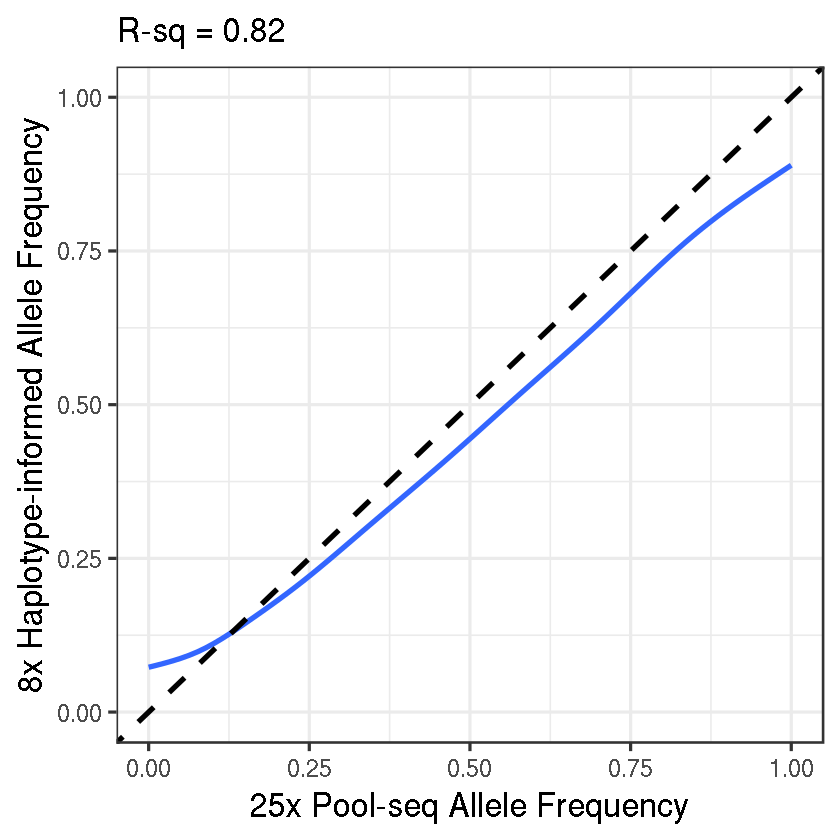

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 10140 rows containing non-finite values (`stat_smooth()`).”


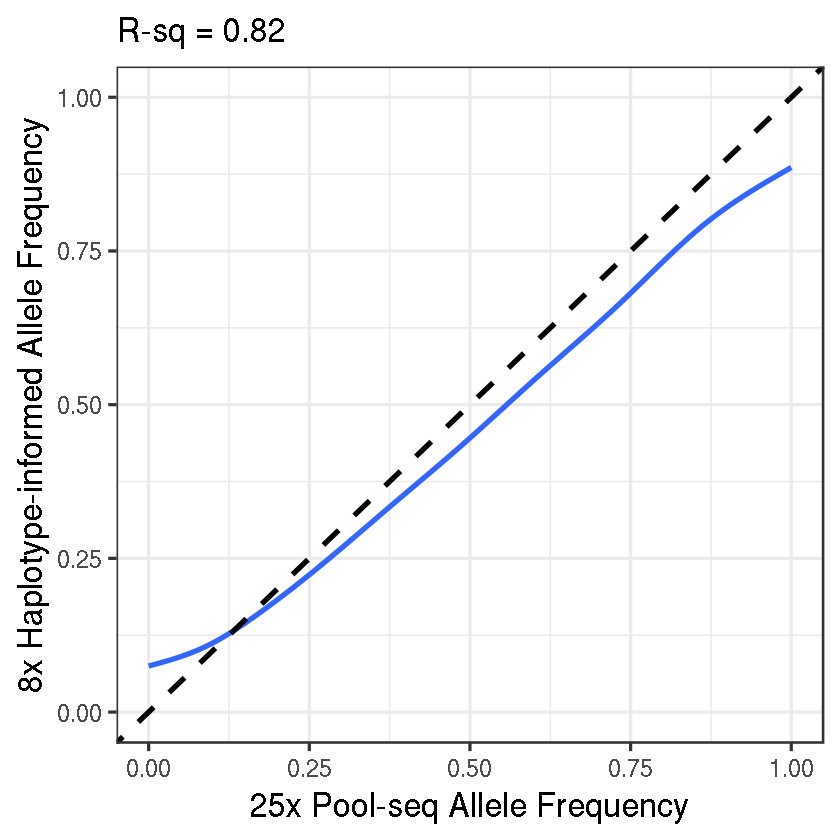

In [40]:
#plot smooth fit of 500000 snps
data.sub = data.11 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "25x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.82')) 
p

ggsave('../../Figures/HAF_PoolSeq_25xComp.t11.GeomSmooth.pdf',p, height = 10, width = 10)

#plot smooth fit of 500000 snps
data.sub = data.3 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "25x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.82')) 
p

ggsave('../../Figures/HAF_PoolSeq_25xComp.t3.GeomSmooth.pdf',p, height = 10, width = 10)

In [41]:
#Compare to 8x:
load('./orch2021_PoolSeq.8x.RData')
#Filter HAFs to only sites where we have data in the PoolSeq:
load('../AFs/orch2021_SubSampReads.A.RData', verbose = TRUE)
df.a = cbind(sites, afmat)
df.a = left_join(sites.PoolSeq, df.a)
sites = df.a %>% dplyr::select(chrom, pos)
afmat = df.a %>% dplyr::select(-chrom, -pos)
afmat = as.data.frame(afmat)
#bind each column of respective samples to each other
afmat.PoolSeq = as.data.frame(afmat.PoolSeq)
data = data.frame()
for (i in 1:ncol(afmat.PoolSeq)){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data = rbind(data, df) 
    
}   
#Run cor.test and linear model
cor.test(data$V1, data$V2)
lm_model <- lm(V1 ~ V2, data = data)
summary(lm_model)
summary_model = summary(lm_model)
coefficients <- coef(summary_model)
slope.8x <- coefficients["V2", "Estimate"]
intercept.8x <- coefficients["(Intercept)", "Estimate"]


Loading objects:
  sites
  samps
  afmat


Joining with `by = join_by(chrom, pos)`



	Pearson's product-moment correlation

data:  data$V1 and data$V2
t = 6351.1, df = 22455000, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8013382 0.8016341
sample estimates:
      cor 
0.8014862 



Call:
lm(formula = V1 ~ V2, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97384 -0.10767 -0.01369  0.09854  0.96030 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0336311  0.0000564   596.3   <2e-16 ***
V2          0.9544735  0.0001503  6351.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1661 on 22455480 degrees of freedom
  (923718 observations deleted due to missingness)
Multiple R-squared:  0.6424,	Adjusted R-squared:  0.6424 
F-statistic: 4.034e+07 on 1 and 22455480 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 19626 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 19626 rows containing non-finite values (`stat_smooth()`).”


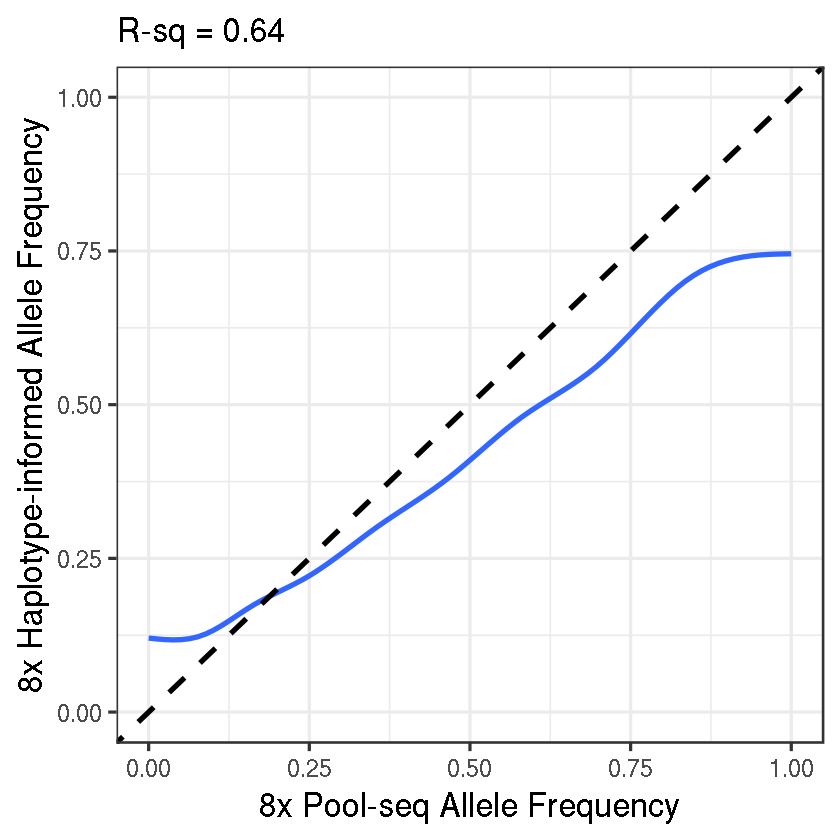

In [33]:
#plot smooth fit of 500000 snps
data.sub = data %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "8x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle('R-sq = 0.64') 
p

ggsave('../../Figures/HAF_PoolSeq_8xComp.GeomSmooth.pdf',p, height = 10, width = 10)

In [42]:
data.11 = data.frame()
for (i in 1:6){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.11 = rbind(data.11, df) 
    
}   


data.3 = data.frame()
for (i in 7:ncol(afmat.PoolSeq)){
    df = as.data.frame(cbind(afmat.PoolSeq[,i], afmat[,i]))
    data.3 = rbind(data.3, df) 
    
}   
#Run cor.test and linear model
lm_model <- lm(V1 ~ V2, data = data.11)
r.11 <- summary(lm_model)$r.squared
r.11

lm_model <- lm(V1 ~ V2, data = data.3)
r.3 <- summary(lm_model)$r.squared
r.3

[1] 0.6505985

[1] 0.6375562

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 19561 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 19561 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 19665 rows containing non-finite values (`stat_smooth()`).”


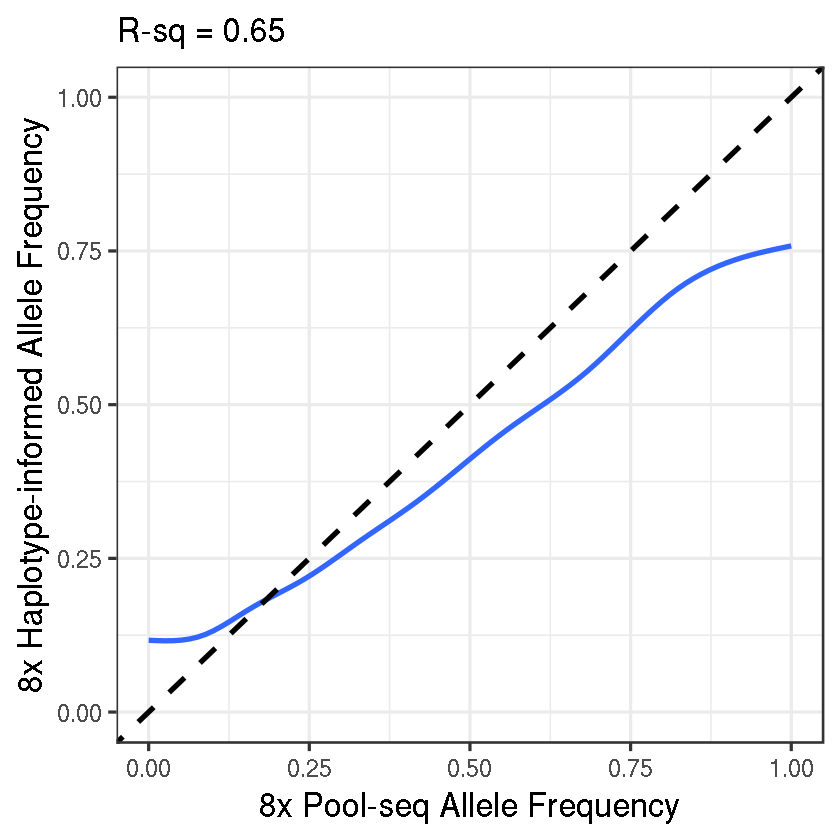

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 19665 rows containing non-finite values (`stat_smooth()`).”


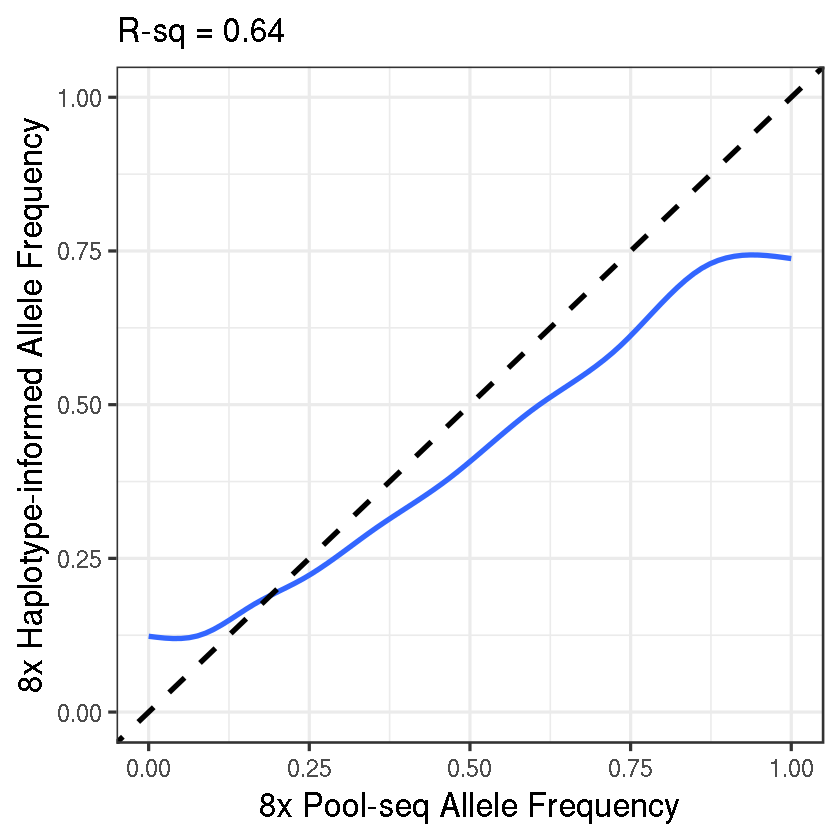

In [43]:
#plot smooth fit of 500000 snps
data.sub = data.11 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "8x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.65')) 
p

ggsave('../../Figures/HAF_PoolSeq_8xComp.t11.GeomSmooth.pdf',p, height = 10, width = 10)

#plot smooth fit of 500000 snps
data.sub = data.3 %>% sample_n(500000)
p = ggplot(data.sub, aes(x = V1, y = V2)) +
  geom_smooth(size = 1.5) +  
    ylim(0,1) +
    xlim(0,1) +
  geom_abline(intercept = 0, slope = 1, color = "black", linetype = 'dashed', size = 1.5) +  # Add 1:1 line
    labs(x = "8x Pool-seq Allele Frequency", y = "8x Haplotype-informed Allele Frequency") +  # Labels and title +
    theme_bw(base_size = 20) +
    ggtitle(paste0('R-sq = 0.64')) 
p

ggsave('../../Figures/HAF_PoolSeq_8xComp.t3.GeomSmooth.pdf',p, height = 10, width = 10)